In [1]:
import pandas as pd
import numpy as np

# Loading Data

In [2]:
!pip3 install ucimlrepo

In [275]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

# Data Visualization
Identifying trends between features in our dataset and how they relate to the label

In [276]:
X.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [277]:
y[:15]

,num
0,0
1,2
2,1
3,0
4,0
5,0
6,3
7,0
8,2
9,1


In [278]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='Count'>

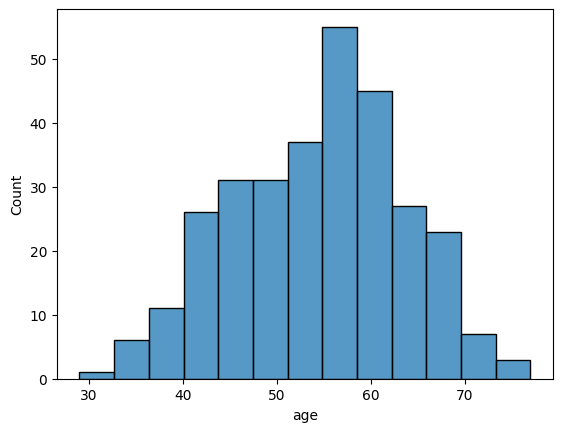

In [279]:
sns.histplot(X['age'])

<Axes: xlabel='sex', ylabel='Count'>

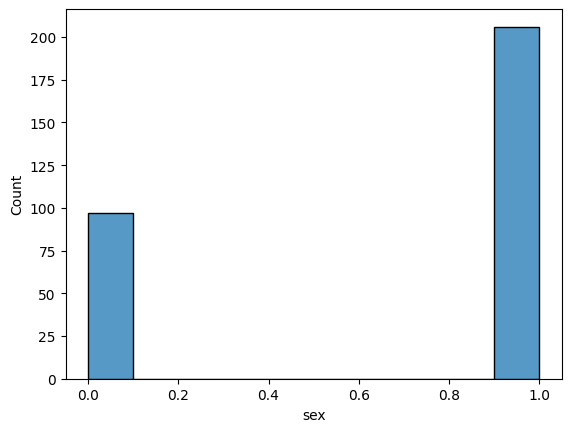

In [280]:
sns.histplot(X['sex'])

<Axes: ylabel='Count'>

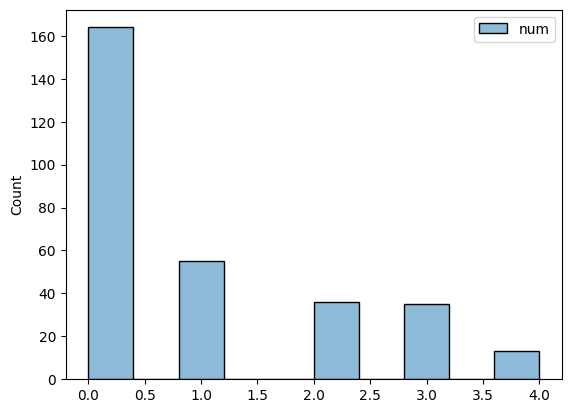

In [281]:
sns.histplot(y)

In [282]:
X['true-label'] = y

In [283]:
y = y.replace({2:1, 3:1, 4:1})

<Axes: ylabel='Count'>

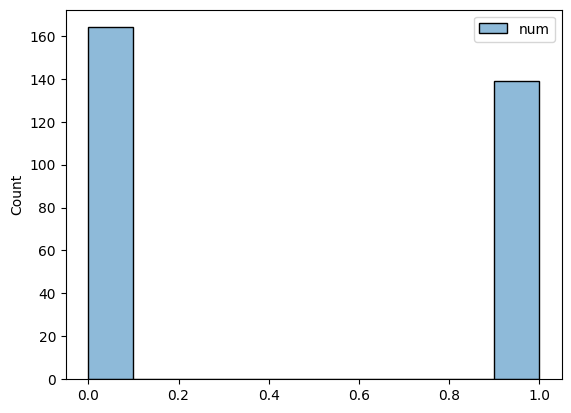

In [284]:
sns.histplot(y)

In [285]:
X['label'] = y

In [286]:
neg_patients = X[X['label']==0]
pos_patients = X[X['label']==1]

In [287]:
neg_patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,true-label,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,56,1,2,130,221,0,2,163,0,0.0,1,0.0,7.0,0,0
289,56,1,2,120,240,0,0,169,0,0.0,3,0.0,3.0,0,0
291,55,0,2,132,342,0,0,166,0,1.2,1,0.0,3.0,0,0
295,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0,0


In [288]:
#sns.catplot(data=X, x=X['sex'], hue='label', kind='swarm')

<Axes: xlabel='age', ylabel='Count'>

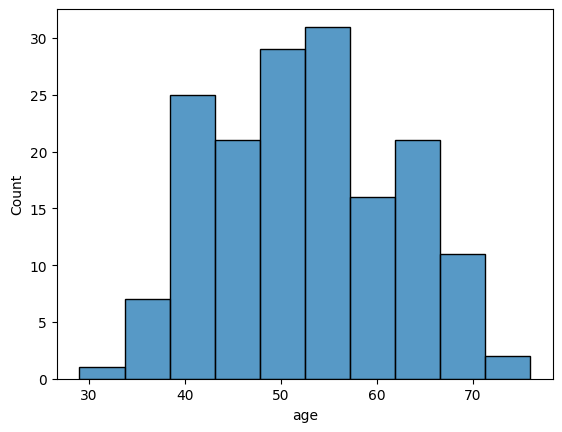

In [289]:
sns.histplot(neg_patients['age'])

<Axes: xlabel='age', ylabel='Count'>

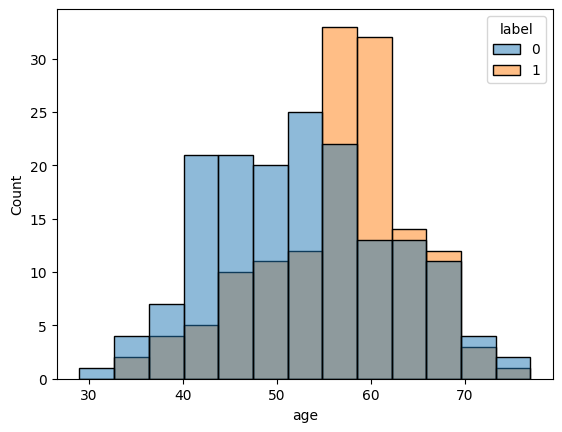

In [290]:
sns.histplot(data=X, x=X['age'],hue='label')

In [291]:
#sns.catplot(data=X, x=X['fbs'],hue='label',kind="swarm")

In [292]:
X.groupby(['fbs', 'label']).count()

age  sex   cp  trestbps  chol  restecg  thalach  exang  oldpeak  \
fbs label                                                                    
0   0      141  141  141       141   141      141      141    141      141   
    1      117  117  117       117   117      117      117    117      117   
1   0       23   23   23        23    23       23       23     23       23   
    1       22   22   22        22    22       22       22     22       22   

           slope   ca  thal  true-label  
fbs label                                
0   0        141  138   140         141  
    1        117  117   117         117  
1   0         23   23    23          23  
    1         22   21    21          22

In [293]:
#sns.catplot(data=X, x=X['restecg'],hue='label',kind='swarm')

In [294]:
X.groupby(['restecg','label']).count()

age  sex  cp  trestbps  chol  fbs  thalach  exang  oldpeak  \
restecg label                                                               
0       0       95   95  95        95    95   95       95     95       95   
        1       56   56  56        56    56   56       56     56       56   
1       0        1    1   1         1     1    1        1      1        1   
        1        3    3   3         3     3    3        3      3        3   
2       0       68   68  68        68    68   68       68     68       68   
        1       80   80  80        80    80   80       80     80       80   

               slope  ca  thal  true-label  
restecg label                               
0       0         95  92    95          95  
        1         56  56    55          56  
1       0          1   1     1           1  
        1          3   3     3           3  
2       0         68  68    67          68  
        1         80  79    80          80

<Axes: xlabel='thalach', ylabel='Count'>

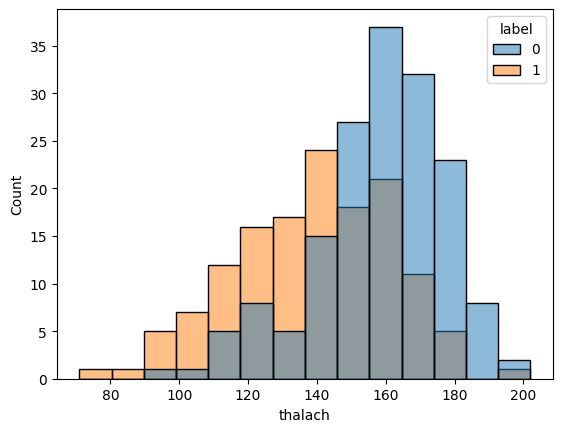

In [295]:
sns.histplot(data=X,x=X['thalach'],hue='label') #maximum heart rate

<Axes: xlabel='trestbps', ylabel='Count'>

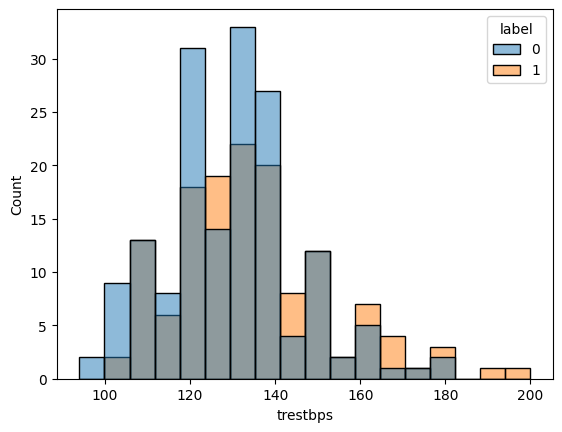

In [296]:
sns.histplot(data=X,x=X['trestbps'],hue='label') #blood pressure

# Preprocessing: Identifying Missing Values

Here, we attempt to address the missing values in the dataset.

In [297]:
X['ca'].isnull().sum().sum()

4

In [298]:
X['thal'].isnull().sum().sum()

2

In [299]:
X['ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [300]:
X['thal'].unique()

array([ 6.,  3.,  7., nan])

In [301]:
df = X

In [302]:
len(df)

303

In [303]:
X.head(303)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,true-label,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


# Preprocessing: KNN 1 - ca
KNN Model with K=1

Now, we will be preprocessing our data by using a K-Nearest-Neighbors (KNN) approach. We'll make two of them: one for ca and one for thal.

In [304]:
df_ca = df.drop('thal', axis=1)

In [305]:
df_thal = df.drop('ca', axis=1)

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
missing_values_mask_ca = df_ca.isnull().any(axis=1)

df_missing = df_ca[missing_values_mask_ca]
df_no_missing = df_ca[~missing_values_mask_ca]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('ca',axis=1), df_no_missing['ca'], df_missing.drop('ca',axis=1), df_missing['ca']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)

In [308]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [309]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
56.666666666666664
[2. 0. 1. 0.]
KNN Testing Set Accuracy:
53.333333333333336
[0. 0. 1. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 3. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
70.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
66.66666666666666
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 2. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
63.33333333333333
[0. 0. 0. 0.]
KNN Testing Set Accuracy:
60.0
[0. 0. 0. 0.]
KNN Testing Set Acc

In [310]:
df.loc[166, 'ca'] = 0
df.loc[192, 'ca'] = 0
df.loc[287, 'ca'] = 2
df.loc[302, 'ca'] = 0

# Preprocessing: KNN 2 - thal
KNN Model with K=1

In [311]:
missing_values_mask_thal = df_thal.isnull().any(axis=1)

df_missing = df_thal[missing_values_mask_thal]
df_no_missing = df_thal[~missing_values_mask_thal]
xtrain, ytrain, xtest, ytest = df_no_missing.drop('thal',axis=1), df_no_missing['thal'], df_missing.drop('thal',axis=1), df_missing['thal']
xtrain, xvalidation, ytrain, yvalidation = train_test_split(xtrain, ytrain, test_size=0.1)

In [312]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,true-label,label
87,53,0,3,128,216,0,2,115,0,0.0,1,0,0
266,52,1,4,128,204,1,0,156,1,1.0,2,2,1


Regression would be better in this case because of the 3-6-7 split in classes, with 6 and 7 being more extreme

In [313]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain, ytrain)
  predictions = knn.predict(xvalidation)
  # Print the score on the testing data
  print("KNN Testing Set Accuracy:")
  print(accuracy_score(yvalidation, predictions)*100)
  print(knn.predict(xtest))

KNN Testing Set Accuracy:
41.935483870967744
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
41.935483870967744
[7. 3.]
KNN Testing Set Accuracy:
38.70967741935484
[7. 3.]
KNN Testing Set Accuracy:
35.483870967741936
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
41.935483870967744
[7. 3.]
KNN Testing Set Accuracy:
32.25806451612903
[7. 3.]
KNN Testing Set Accuracy:
35.483870967741936
[7. 3.]
KNN Testing Set Accuracy:
32.25806451612903
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
45.16129032258064
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Testing Set Accuracy:
48.38709677419355
[7. 3.]
KNN Tes

In [314]:
df.loc[87, 'thal'] = 7
df.loc[266, 'thal'] = 3

# Preprocessing: Others

In [315]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,true-label,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0


In [316]:
df['cp']/=4

In [317]:
df['trestbps'] = (df['trestbps'] - df['trestbps'].mean(axis=0))/df['trestbps'].std()

In [318]:
df['chol'] = (df['chol'] - df['chol'].mean(axis=0))/df['chol'].std()

In [319]:
df['restecg']/=2

In [320]:
df['thalach'] = (df['thalach'] - df['thalach'].mean(axis=0))/df['thalach'].std()

In [321]:
df['oldpeak'] = (df['oldpeak'] - df['oldpeak'].mean(axis=0))/df['oldpeak'].std()

In [322]:
df['ca']/=3

In [323]:
df['thal']/=7

In [324]:
df['age'] = (df['age'] - df['age'].mean(axis=0))/df['age'].std()

In [325]:
df['slope']/=3

In [326]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,true-label,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2,1
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0,0


# Resampling Code: Before Train-Test-Split using SMOTE (binary)

In [ ]:
import pandas as pd

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,true-label,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2,1
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0,0


In [ ]:
df_bin = df.drop('true-label', axis=1)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = df_bin.drop('label',axis=1), df_bin['label']
X_res, y_res = sm.fit_resample(X, y.ravel())

In [ ]:
df_upsampled_bin = X_res
df_upsampled_bin['label'] = y_res
df_upsampled_bin.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,1
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


In [ ]:
sum(df_upsampled_bin.duplicated()==True)

0

# Resampling Code: Before Train-Test-Split using SMOTE (multi-class)

In [327]:
df_multi = df.drop('label',axis=1)

In [328]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X, y = df_multi.drop('true-label',axis=1), df_multi['true-label']
X_res, y_res = sm.fit_resample(X, y.ravel())

/var/folders/rn/ry_5bfb11bvcnryvb2p6pfrr0000gn/T/ipykernel_2149/1813379721.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())


In [329]:
df_upsampled_multi = X_res
df_upsampled_multi['label'] = y_res
df_upsampled_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0.947160,1,0.25,0.756274,-0.264463,1,1.0,0.017169,0,1.085542,1.000000,0.000000,0.857143,0
1,1.389703,1,1.00,1.608559,0.759159,0,1.0,-1.818896,1,0.396526,0.666667,1.000000,0.428571,2
2,1.389703,1,1.00,-0.664201,-0.341717,0,1.0,-0.900864,1,1.343924,0.666667,0.666667,1.000000,1
3,-1.929372,1,0.75,-0.096011,0.063869,0,0.0,1.634655,0,2.119067,1.000000,0.000000,0.428571,0
4,-1.486829,0,0.50,-0.096011,-0.824558,0,1.0,0.978917,0,0.310399,0.333333,0.000000,0.428571,0


In [330]:
X_res.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
815    False
816    False
817    False
818    False
819    False
Length: 820, dtype: bool

# [SKIP] Resampling Code: Before Train-Test-Split through resampling

In [ ]:
from sklearn.utils import resample

In [ ]:
df_label4 = df[df['true-label']==4]
df_label1 = df[df['true-label']==1]
df_label2 = df[df['true-label']==2]
df_label3 = df[df['true-label']==3]
df_label0 = df[df['true-label']==0]

In [ ]:
df_1_upsampled = resample(df_label1,random_state=42,n_samples=164,replace=True)
df_2_upsampled = resample(df_label2,random_state=42,n_samples=164,replace=True)
df_3_upsampled = resample(df_label3,random_state=42,n_samples=164,replace=True)
df_4_upsampled = resample(df_label4,random_state=42,n_samples=164,replace=True)

In [ ]:
df_upsampled = pd.concat([df_label0, df_1_upsampled,df_2_upsampled, df_3_upsampled, df_4_upsampled])

In [ ]:
df_upsampled.groupby('true-label').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
true-label,,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,164,164,164
1,164,164,164,164,164,164,164,164,164,164,164,164,164,164
2,164,164,164,164,164,164,164,164,164,164,164,164,164,164
3,164,164,164,164,164,164,164,164,164,164,164,164,164,164
4,164,164,164,164,164,164,164,164,164,164,164,164,164,164


# Train Test Split Code: After Resampling (MULTI-CLASS)

In [478]:
from sklearn.model_selection import train_test_split

In [479]:
X, y = df_upsampled_multi.drop('label',axis=1), df_upsampled_multi['label']

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

# Train Test Split Code: After Resampling (BINARY)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = df_upsampled_bin.drop('label',axis=1), df_upsampled_bin['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

# [SKIP] Train Test Split Code: Before Resampling Train-Test Sets

In [ ]:
binary_label = df['label']
X = df.drop('label', axis=1)
X = X.drop('true-label', axis=1)
y = df['true-label']
X_train_unb, X_test_unb, y_train_unb, y_test_unb = train_test_split(X, y, test_size=0.2)#, random_state=42)

# [SKIP]Resampling Code: After Train-Test-Split

In [ ]:
import pandas as pd
from sklearn.utils import resample

In [ ]:
df_train = X_train_unb
df_train['true-label'] = y_train_unb

In [ ]:
df_train.groupby('true-label').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
true-label,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,130,130,130
1,44,44,44,44,44,44,44,44,44,44,44,44,44
2,31,31,31,31,31,31,31,31,31,31,31,31,31
3,26,26,26,26,26,26,26,26,26,26,26,26,26
4,11,11,11,11,11,11,11,11,11,11,11,11,11


In [ ]:
trainsamples = len(df_train[df_train['true-label']==0])
df_label4 = df_train[df_train['true-label']==4]
df_label1 = df_train[df_train['true-label']==1]
df_label2 = df_train[df_train['true-label']==2]
df_label3 = df_train[df_train['true-label']==3]
df_label0 = df_train[df_train['true-label']==0]
df_1_upsampled = resample(df_label1,random_state=42,n_samples=trainsamples,replace=True)
df_2_upsampled = resample(df_label2,random_state=42,n_samples=trainsamples,replace=True)
df_3_upsampled = resample(df_label3,random_state=42,n_samples=trainsamples,replace=True)
df_4_upsampled = resample(df_label4,random_state=42,n_samples=trainsamples,replace=True)
df_train_upsampled = pd.concat([df_label0, df_1_upsampled,df_2_upsampled, df_3_upsampled, df_4_upsampled])

In [ ]:
df_train_upsampled.groupby('true-label').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
true-label,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,130,130,130
1,130,130,130,130,130,130,130,130,130,130,130,130,130
2,130,130,130,130,130,130,130,130,130,130,130,130,130
3,130,130,130,130,130,130,130,130,130,130,130,130,130
4,130,130,130,130,130,130,130,130,130,130,130,130,130


In [ ]:
X_train_bal, y_train_bal = df_train_upsampled.drop('true-label',axis=1), df_train_upsampled['true-label']

In [ ]:
df_test = X_test_unb
df_test['true-label'] = y_test_unb

In [ ]:
df_test.groupby('true-label').count()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
true-label,,,,,,,,,,,,,
0,34,34,34,34,34,34,34,34,34,34,34,34,34
1,11,11,11,11,11,11,11,11,11,11,11,11,11
2,5,5,5,5,5,5,5,5,5,5,5,5,5
3,9,9,9,9,9,9,9,9,9,9,9,9,9
4,2,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
testsamples = len(df_test[df_test['true-label']==0])

In [ ]:
df_label4 = df_test[df_test['true-label']==4]
df_label1 = df_test[df_test['true-label']==1]
df_label2 = df_test[df_test['true-label']==2]
df_label3 = df_test[df_test['true-label']==3]
df_label0 = df_test[df_test['true-label']==0]
df_1_upsampled = resample(df_label1,random_state=42,n_samples=testsamples,replace=True)
df_2_upsampled = resample(df_label2,random_state=42,n_samples=testsamples,replace=True)
df_3_upsampled = resample(df_label3,random_state=42,n_samples=testsamples,replace=True)
df_4_upsampled = resample(df_label4,random_state=42,n_samples=testsamples,replace=True)
df_test_upsampled = pd.concat([df_label0, df_1_upsampled,df_2_upsampled, df_3_upsampled, df_4_upsampled])

In [ ]:
X_test_bal, y_test_bal = df_test_upsampled.drop('true-label',axis=1), df_test_upsampled['true-label']

# Model 1: Logistic Regression
For reference, our Pandas DataFrame is now called 'df.'

In [481]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [482]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [483]:
y_pred = model.predict(X_test)

In [484]:
log_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {log_accuracy}")

Accuracy: 0.6097560975609756


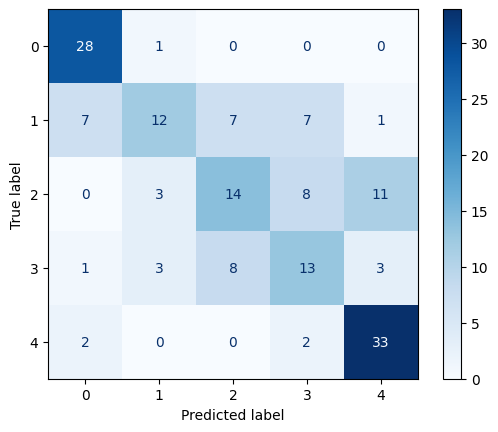

In [485]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Other models to implement:

Classification - Logistic Regression, K-Nearest-Neighbors, MLP, Random Forest Classifier

Regression - Linear Regression, Random Forest Regressor

In [486]:
model.coef_[0]

array([-0.11184898, -0.75611209, -1.78842159, -0.23706863, -0.04619655,
        0.81819185, -0.74565323,  0.37000596, -0.3024513 , -0.49015262,
       -1.27282295, -2.97317729, -2.26369722])

In [487]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")


Precision for Zero vs Non-Zero: 0.5944026013309134
Recall for Zero vs Non-Zero: 0.6127049825832787


# Model 2: Random Forest Classifier

In [488]:
from sklearn.ensemble import RandomForestClassifier

In [489]:
model = RandomForestClassifier(n_estimators=128)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {rf_accuracy}, N estimators: {128}")

Accuracy score: 0.9024390243902439, N estimators: 128


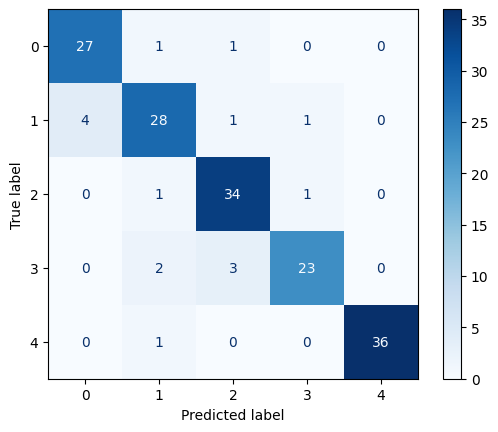

In [490]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [491]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.9022494924430408
Recall for Zero vs Non-Zero: 0.8986819766738631


# Model 3: K-Nearest-Neighbors (KNN) Classifier

In [492]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {knn_accuracy}, K: {1}")

Accuracy score: 0.8963414634146342, K: 1


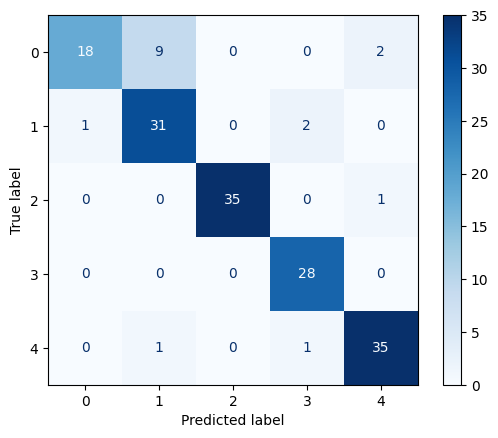

In [493]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [494]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.9055488840117605
Recall for Zero vs Non-Zero: 0.890124505844587


# Model 4: Multilayer Perceptron (MLP) Classifier

In [495]:
from sklearn.neural_network import MLPClassifier

In [496]:
model = MLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {mlp_accuracy}")

Accuracy score: 0.7926829268292683


/Users/anirudhchintaluri/Documents/jupyter/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


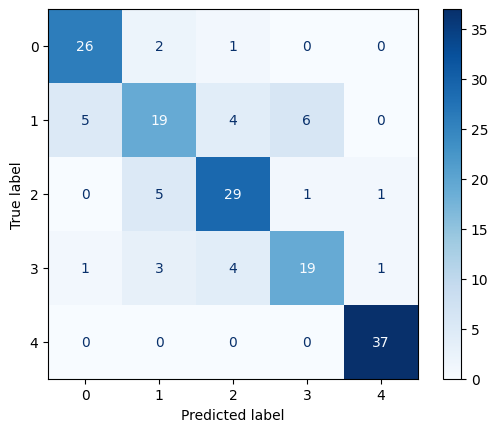

In [497]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [498]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7820634976034251
Recall for Zero vs Non-Zero: 0.7879004475353361


# Model 5: Linear Regression

In [450]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [451]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
linreg_accuracy = r2_score(y_test, y_pred)
print(f"R2 score: {linreg_accuracy}")

R2 score: 0.505717329955535


# Model 6: Support Vector Machines (SVM) Classifier

In [499]:
from sklearn.svm import SVC

In [500]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {svc_accuracy}")

Accuracy score: 0.774390243902439


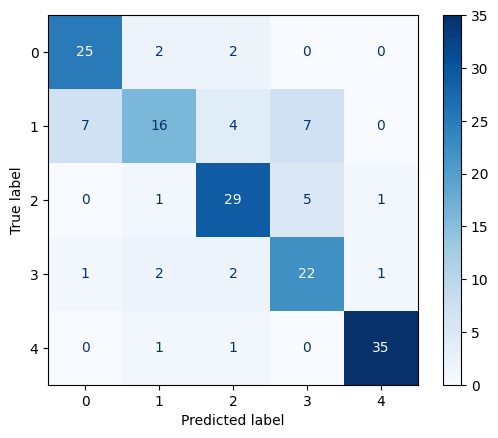

In [501]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [502]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7682022298121369
Recall for Zero vs Non-Zero: 0.7739745976054292


# Model 7: Decision Tree Classifier

In [503]:
from sklearn.tree import DecisionTreeClassifier

In [504]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {dt_accuracy}")

Accuracy score: 0.774390243902439


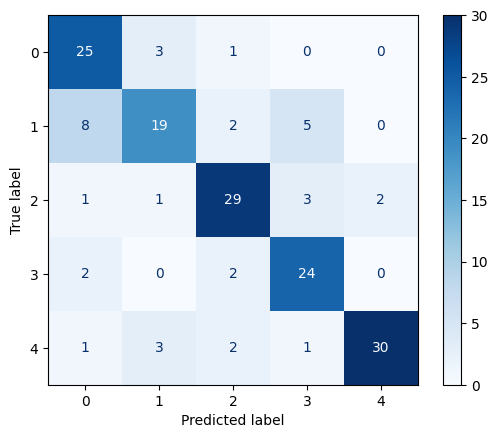

In [505]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [506]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.7753546378546379
Recall for Zero vs Non-Zero: 0.778880343687646


# Custom TensorFlow Model - Multi-class Classification

In [507]:
from keras.models import Sequential, load_model
from keras.layers import Dense, InputLayer, Activation, Conv2D, MaxPooling2D, Add
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from keras.losses import SparseCategoricalCrossentropy

In [508]:
X.shape

(820, 13)

In [509]:
from keras.callbacks import ModelCheckpoint, Callback

In [510]:
class SaveBestModel(Callback):
  def __init__(self, save_path):
    super(SaveBestModel, self).__init__()
    self.save_path = save_path
    self.best_acc_sum = -np.Inf
    self.best_epoch = -1
  def on_epoch_end(self, epoch, logs=None):
    current_val_accuracy = logs.get('val_accuracy')
    current_accuracy = logs.get('accuracy')
    if current_val_accuracy+current_accuracy>=self.best_acc_sum and epoch>20 and current_accuracy!=1:
      self.best_acc_sum = current_val_accuracy+current_accuracy
      self.best_epoch = epoch
      self.model.save(self.save_path)
      print(f"\nEpoch {epoch+1}: val_accuracy improved to {current_val_accuracy}, saving model to {self.save_path}")

In [511]:
callbacks_list = [
      #ModelCheckpoint(filepath='checkpoint_path_multi.keras', monitor='val_loss', save_best_only=True),
      SaveBestModel(save_path='checkpoint_custom_callback.keras')
]

In [512]:
from keras import Input, Model

In [513]:
inLayer = Input(shape=(13,))
x = Dense(1024, activation='relu')(inLayer)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
skip = Add()([inLayer, x])
x = Dense(512, activation='relu')(skip)
outLayer = Dense(5, activation='softmax')(x)
model = Model(inputs=inLayer, outputs=outLayer)

In [514]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 13)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 1024)      │     14,336 │ input_layer_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 512)       │    524,800 │ dense_63[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 512)       │    262,656 │ dense_64[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 13)        │      6,669 │ dense_65[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 13)        │          0 │ input_layer_7[0]… │
│                     │                   │            │ dense_66[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 512)       │      7,168 │ add_14[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 512)       │    262,656 │ dense_67[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 13)        │      6,669 │ dense_68[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 13)        │          0 │ input_layer_7[0]… │
│                     │                   │            │ dense_69[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 512)       │      7,168 │ add_15[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 5)         │      2,565 │ dense_70[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,094,687 (4.18 MB)

 Trainable params: 1,094,687 (4.18 MB)

 Non-trainable params: 0 (0.00 B)

In [515]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [516]:
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=400, shuffle=True, verbose=1, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2285 - loss: 1.6222 - val_accuracy: 0.1890 - val_loss: 1.6420
Epoch 2/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2643 - loss: 1.6103 - val_accuracy: 0.1890 - val_loss: 1.6311
Epoch 3/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3168 - loss: 1.5916 - val_accuracy: 0.1951 - val_loss: 1.6216
Epoch 4/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3057 - loss: 1.5967 - val_accuracy: 0.2134 - val_loss: 1.6116
Epoch 5/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3119 - loss: 1.5833 - val_accuracy: 0.2500 - val_loss: 1.6024
Epoch 6/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3089 - loss: 1.5791 - val_accuracy: 0.2866 - val_loss: 1.5938
Epoch 7/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3459 - loss: 1.5720 - val_accuracy: 0.2988 - val_loss: 1.5854
Epoch 8/400
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3340 - loss: 1.5657 - val_accuracy: 0.2988 - v

In [517]:
def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.2, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')
    ax.legend(loc = 7)
    ax.set_ylim([0, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')

    plt.show()
    print(f"The best epoch is: {best_epoch+1}")

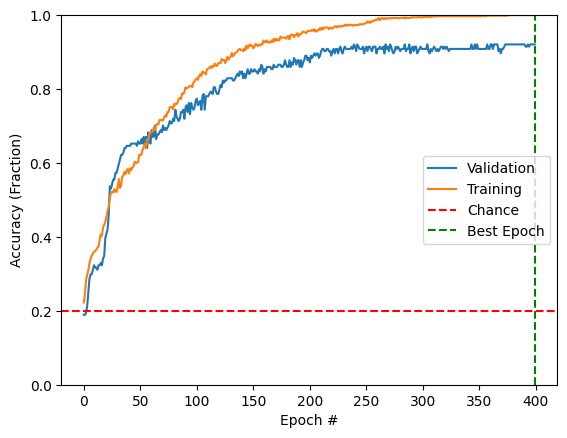

The best epoch is: 400.0


In [518]:
plot_acc(history)

In [519]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.4871


[0.5393591523170471, 0.9207317233085632]

In [520]:
cp_model = load_model("checkpoint_custom_callback.keras")

In [521]:
cp_model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9401 - loss: 0.4466 


[0.5050879120826721, 0.9207317233085632]

In [522]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


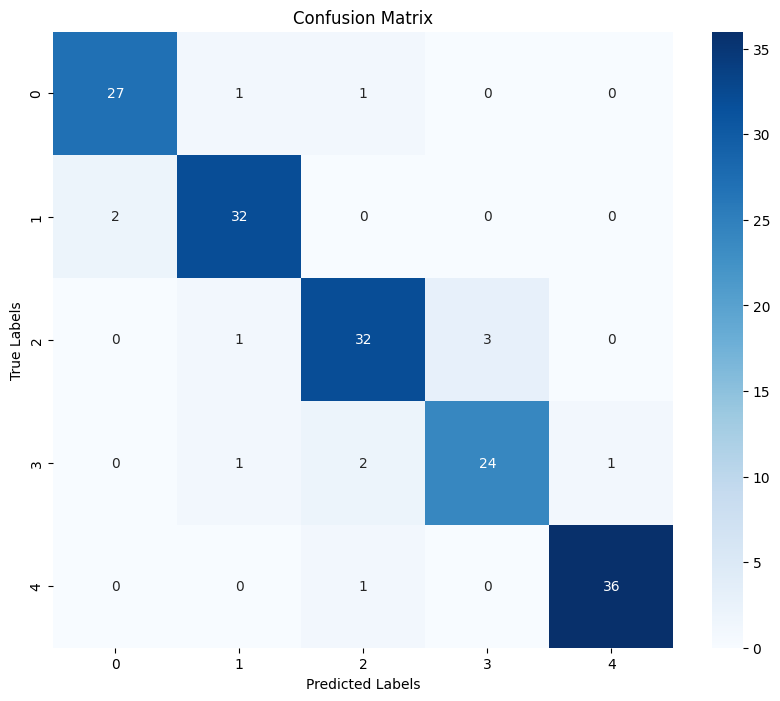

In [523]:
y_pred_probs = cp_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in sparse format (not one-hot encoded)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [524]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

# Assuming y_true and y_pred are your true and predicted labels

# Convert to binary: Zero (class 0) vs Non-Zero (classes 1, 2, 3, 4)
# Precision and Recall
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Precision for Zero vs Non-Zero: {precision}")
print(f"Recall for Zero vs Non-Zero: {recall}")

Precision for Zero vs Non-Zero: 0.9192141895590172
Recall for Zero vs Non-Zero: 0.918243134470315


# Custom TensorFlow Model - Binary Classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Activation
from keras.optimizers import Adam
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
def swish(x, beta=1.0):
    return x * K.sigmoid(beta * x)

In [ ]:
inLayer = keras.Input(shape=(13,))
x = Dense(1024, activation='relu')(inLayer)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(13, activation='relu')(x)
outLayer = Dense(1, activation='sigmoid')(x)
binary_model = keras.Model(inputs=inLayer, outputs=outLayer)

In [ ]:
y_train_binary = y_train.replace({2:1, 3:1, 4:1})
y_test_binary = y_test.replace({2:1, 3:1, 4:1})

In [ ]:
binary_model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 13)]              0         
                                                                 
 dense_164 (Dense)           (None, 1024)              14336     
                                                                 
 dense_165 (Dense)           (None, 512)               524800    
                                                                 
 dense_166 (Dense)           (None, 13)                6669      
                                                                 
 dense_167 (Dense)           (None, 512)               7168      
                                                                 
 dense_168 (Dense)           (None, 13)                6669      
                                                                 
 dense_169 (Dense)           (None, 1)                 14 

In [ ]:
class SaveBestModel(keras.callbacks.Callback):
  def __init__(self, save_path):
    super(SaveBestModel, self).__init__()
    self.save_path = save_path
    self.best_acc_sum = -np.Inf
    self.best_epoch = -1
  def on_epoch_end(self, epoch, logs=None):
    current_val_accuracy = logs.get('val_accuracy')
    current_accuracy = logs.get('accuracy')
    if current_val_accuracy+current_accuracy>=self.best_acc_sum and epoch>20 and current_accuracy!=1:
      self.best_acc_sum = current_val_accuracy+current_accuracy
      self.best_epoch = epoch
      self.model.save(self.save_path)
      print(f"\nEpoch {epoch+1}: val_accuracy improved to {current_val_accuracy}, saving model to {self.save_path}")

In [ ]:
'''checkpoint_callback_binary = ModelCheckpoint(
    filepath='binary_model_epoch_{epoch:02d}.h5',  # Save model with epoch number in filename
    save_freq='epoch'                      # Save at the end of every epoch
)'''
callbacks_list = [
      SaveBestModel(save_path="checkpoint_custom_binary.keras")
]

In [ ]:
binary_model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
binary_history = binary_model.fit(x=X_train, y=y_train_binary, batch_size=20, epochs=400, shuffle=True, verbose=1, validation_data=(X_test, y_test_binary), callbacks=callbacks_list)#, callbacks=[checkpoint_callback_binary])

Epoch 1/400
14/14 [==============================] - 5s 54ms/step - loss: 0.6936 - accuracy: 0.4313 - val_loss: 0.6928 - val_accuracy: 0.5152
Epoch 2/400
14/14 [==============================] - 0s 21ms/step - loss: 0.6923 - accuracy: 0.5382 - val_loss: 0.6919 - val_accuracy: 0.5909
Epoch 3/400
14/14 [==============================] - 0s 19ms/step - loss: 0.6912 - accuracy: 0.5802 - val_loss: 0.6908 - val_accuracy: 0.6212
Epoch 4/400
14/14 [==============================] - 0s 19ms/step - loss: 0.6899 - accuracy: 0.5992 - val_loss: 0.6899 - val_accuracy: 0.6515
Epoch 5/400
14/14 [==============================] - 0s 24ms/step - loss: 0.6885 - accuracy: 0.6489 - val_loss: 0.6890 - val_accuracy: 0.6515
Epoch 6/400
14/14 [==============================] - 0s 27ms/step - loss: 0.6870 - accuracy: 0.6908 - val_loss: 0.6878 - val_accuracy: 0.6667
Epoch 7/400
14/14 [==============================] - 0s 34ms/step - loss: 0.6851 - accuracy: 0.7099 - val_loss: 0.6867 - val_accuracy: 0.6515
Epoch 

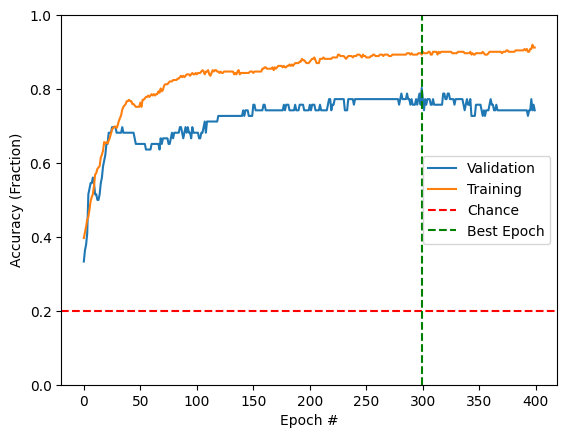

The best epoch is: 300.0


In [ ]:
plot_acc(binary_history)

In [ ]:
from keras.models import load_model

In [ ]:
binary_model = load_model('checkpoint_path.keras')

In [ ]:
binary_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.4734 - accuracy: 0.8182


[0.4734016954898834, 0.8181818127632141]

In [ ]:
binary_model.predict(X_test)

3/3 [==============================] - 0s 15ms/step


array([[0.85747546],
       [0.10842283],
       [0.7793164 ],
       [0.8386966 ],
       [0.16678883],
       [0.83488095],
       [0.28697288],
       [0.6990426 ],
       [0.8574707 ],
       [0.84248585],
       [0.3499564 ],
       [0.8137768 ],
       [0.14979681],
       [0.12718605],
       [0.8232805 ],
       [0.21332447],
       [0.1607482 ],
       [0.15574975],
       [0.2492289 ],
       [0.30947575],
       [0.09153   ],
       [0.14554743],
       [0.82709223],
       [0.26459086],
       [0.22021107],
       [0.7916957 ],
       [0.7662045 ],
       [0.14276697],
       [0.54310685],
       [0.8289744 ],
       [0.75675   ],
       [0.25902578],
       [0.15122807],
       [0.13199265],
       [0.17446068],
       [0.8060982 ],
       [0.5286609 ],
       [0.13535166],
       [0.08852187],
       [0.30693677],
       [0.5628991 ],
       [0.3404949 ],
       [0.31872693],
       [0.79801667],
       [0.85658634],
       [0.15396743],
       [0.19744374],
       [0.095

# Visualizing Model Results

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

In [ ]:
x_col = np.array(X[['age','oldpeak']])
y_clf = np.array(y)

In [ ]:
plot_model = DecisionTreeClassifier()

In [ ]:
plot_model.fit(x_col, y_clf)

DecisionTreeClassifier()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<Axes: >

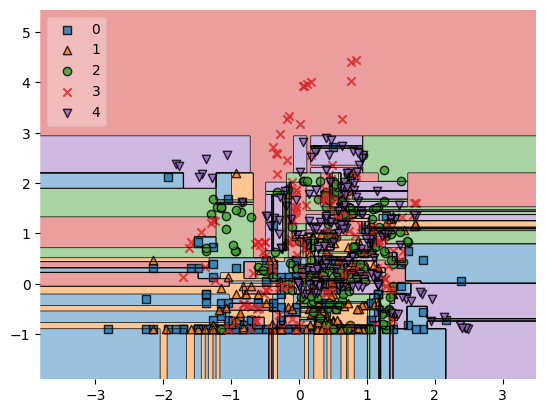

In [ ]:
plot_decision_regions(x_col, y_clf, clf=plot_model, legend=2)